Question 1

In [1]:
import pandas as pd
import sklearn
import numpy as np
from scipy import stats
import statistics 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)

Question 2

In [2]:
print(california_housing.frame['AveOccup'])

0        2.555556
1        2.109842
2        2.802260
3        2.547945
4        2.181467
           ...   
20635    2.560606
20636    3.122807
20637    2.325635
20638    2.123209
20639    2.616981
Name: AveOccup, Length: 20640, dtype: float64


In [3]:
occupants = california_housing.frame['AveOccup']

Question 3

In [4]:
# Overall summary 

In [5]:
occupants.describe()

count    20640.000000
mean         3.070655
std         10.386050
min          0.692308
25%          2.429741
50%          2.818116
75%          3.282261
max       1243.333333
Name: AveOccup, dtype: float64

In [6]:
sum(occupants)

63378.32249076677

In [7]:
# median 

In [8]:
occupants.median()

2.818115654360196

In [9]:
# mode

In [10]:
most_occup = california_housing.frame['AveOccup']
most_occup.value_counts()

AveOccup
3.000000    35
2.000000    18
2.500000    17
2.666667    16
2.333333    13
            ..
2.425926     1
2.942568     1
2.816254     1
2.837104     1
2.616981     1
Name: count, Length: 18841, dtype: int64

In [11]:
# Average Absolute Deviation 

In [12]:
data = pd.Series(occupants)
aad = (data - data.mean()).abs().mean()
aad

np.float64(0.7481716943190008)

In [13]:
# Median Absolute Deviation 

In [14]:
mad = (data - data.median()).abs().median()
mad

0.4195255876670947

In [15]:
# Variance 

In [16]:
statistics.variance(data)

107.87002550875769

Question 4: Histogram 1 

In [17]:
df = pd.DataFrame(
    {'ave_occupants': occupants
    })

df

,ave_occupants
0,2.555556
1,2.109842
2,2.802260
3,2.547945
4,2.181467
...,...
20635,2.560606
20636,3.122807
20637,2.325635
20638,2.123209


In [18]:
df_clean = df[df['ave_occupants'] < 10]

(0.0, 8.0)

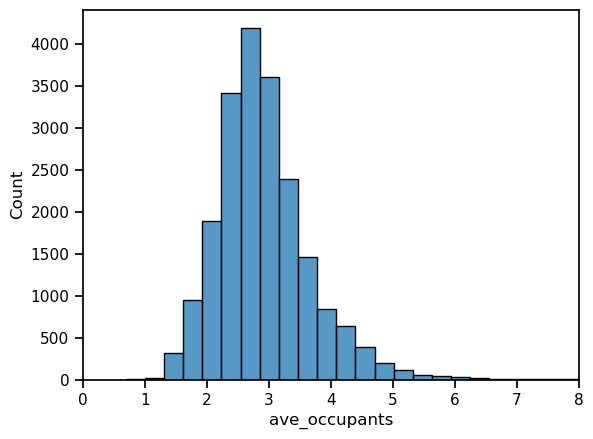

In [19]:
sns.set_context("notebook", font_scale = 1)

sns.histplot(data = df_clean['ave_occupants'], bins = 30)
plt.xlim(0, 8)

Question 5: Histogram 2

(0.0, 8.0)

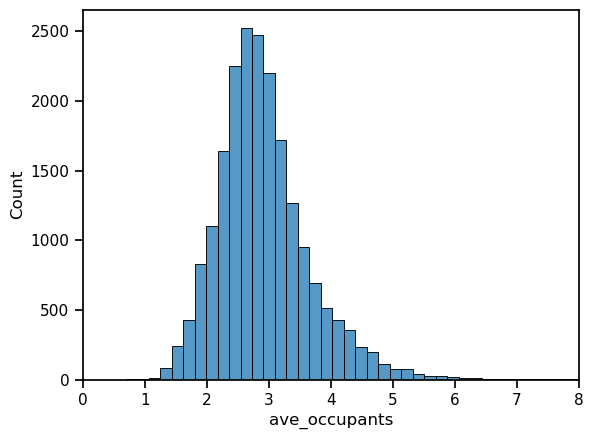

In [20]:
sns.set_context("notebook", font_scale = 1)

sns.histplot(data = df_clean['ave_occupants'], bins = 50)
plt.xlim(0, 8)

Question 6

Categories:
Low occupancy (0-2.5)
Moderate occupancy (2.5-3.5)
High occupancy (3.5-6)
Very high occupancy (6+)

In [21]:
df_clean['occup_categories'] = pd.cut(x = df['ave_occupants'], bins = [0,2.5,3.5,6,8], labels = ['small', 'medium', 'large', 'very_large'])
df

C:\Users\jazmi\AppData\Local\Temp\ipykernel_11444\4000355159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['occup_categories'] = pd.cut(x = df['ave_occupants'], bins = [0,2.5,3.5,6,8], labels = ['small', 'medium', 'large', 'very_large'])


,ave_occupants
0,2.555556
1,2.109842
2,2.802260
3,2.547945
4,2.181467
...,...
20635,2.560606
20636,3.122807
20637,2.325635
20638,2.123209


Question 7

In [22]:
observed = df_clean['occup_categories'].value_counts()
observed

occup_categories
medium        10892
small          6053
large          3581
very_large       61
Name: count, dtype: int64

Question 8

([<matplotlib.patches.Wedge at 0x12b0902a900>,
 [Text(-0.10032519689306404, 1.0954153800583448, 'Medium'),
  Text(-0.4927147385147585, -0.9834796319448275, 'Small'),
  Text(0.9289997844471319, -0.5890325971431314, 'Large'),
  Text(1.0999523424142685, -0.010239356296370314, 'Very_Large')])

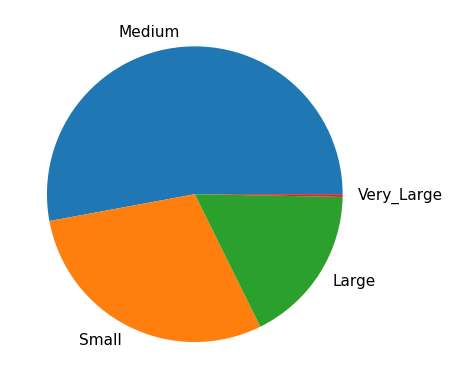

In [23]:
sizes = [10892, 6053, 3581, 61]
labels = ['Medium', 'Small', 'Large', 'Very_Large']
plt.pie(sizes, labels=labels)

Question 9

In [24]:
occupants.skew(axis = 0, skipna = True)

np.float64(97.63956096369486)

AI helped me with the figuring out logarithmic transformation

In [25]:
df['occup_log_values'] = np.log(df['ave_occupants']) #

print(df)

       ave_occupants  occup_log_values
0           2.555556          0.938270
1           2.109842          0.746613
2           2.802260          1.030426
3           2.547945          0.935287
4           2.181467          0.779998
...              ...               ...
20635       2.560606          0.940244
20636       3.122807          1.138732
20637       2.325635          0.843993
20638       2.123209          0.752929
20639       2.616981          0.962021

[20640 rows x 2 columns]


C:\Users\jazmi\AppData\Local\Temp\ipykernel_11444\1169495169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['occup_log_values'] = np.log(df_clean['ave_occupants'])


Text(0, 0.5, 'Counts')

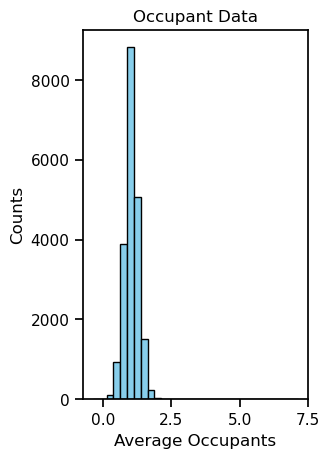

In [26]:
df_clean['occup_log_values'] = np.log(df_clean['ave_occupants']) 
plt.subplot(1, 2, 1)
plt.hist(df['occup_log_values'], bins=30, color='skyblue', edgecolor='black')
plt.title('Occupant Data')
plt.xlabel('Average Occupants')
plt.ylabel('Counts')

Question 10

In [27]:
print(california_housing.frame['MedHouseVal'])

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64


In [28]:
houseval = california_housing.frame['MedHouseVal']

In [29]:
houseval.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

(0.0, 8.0)

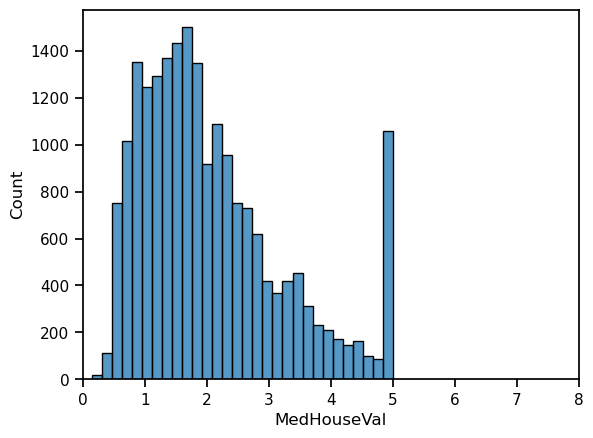

In [30]:
sns.set_context("notebook", font_scale = 1)

sns.histplot(data = california_housing.frame, x="MedHouseVal", bins = 30)
plt.xlim(0, 8)

In [31]:
# Variable transformation 

In [32]:
df_hv = pd.DataFrame(
    {'med_house_val': houseval
    })

df_hv

,med_house_val
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [33]:
df_hv['hv_categories'] = pd.cut(x = df_hv['med_house_val'], bins = [0,1.5, 3, 4.5, 5], labels = ['low', 'moderate', 'high', 'very_high'])
df_hv

,med_house_val,hv_categories
0,4.526,very_high
1,3.585,high
2,3.521,high
3,3.413,high
4,3.422,high
...,...,...
20635,0.781,low
20636,0.771,low
20637,0.923,low
20638,0.847,low


In [34]:
df_hv['hv_log_values'] = np.log(df_hv['med_house_val']) 

print(df_hv)

       med_house_val hv_categories  hv_log_values
0              4.526     very_high       1.509839
1              3.585          high       1.276758
2              3.521          high       1.258745
3              3.413          high       1.227592
4              3.422          high       1.230225
...              ...           ...            ...
20635          0.781           low      -0.247180
20636          0.771           low      -0.260067
20637          0.923           low      -0.080126
20638          0.847           low      -0.166055
20639          0.894           low      -0.112050

[20640 rows x 3 columns]


In [35]:
merged_df = df_clean.join(df_hv)
print(merged_df)

       ave_occupants occup_categories  occup_log_values  med_house_val  \
0           2.555556           medium          0.938270          4.526   
1           2.109842            small          0.746613          3.585   
2           2.802260           medium          1.030426          3.521   
3           2.547945           medium          0.935287          3.413   
4           2.181467            small          0.779998          3.422   
...              ...              ...               ...            ...   
20635       2.560606           medium          0.940244          0.781   
20636       3.122807           medium          1.138732          0.771   
20637       2.325635            small          0.843993          0.923   
20638       2.123209            small          0.752929          0.847   
20639       2.616981           medium          0.962021          0.894   

      hv_categories  hv_log_values  
0         very_high       1.509839  
1              high       1.276758  


(0.0, 8.0)

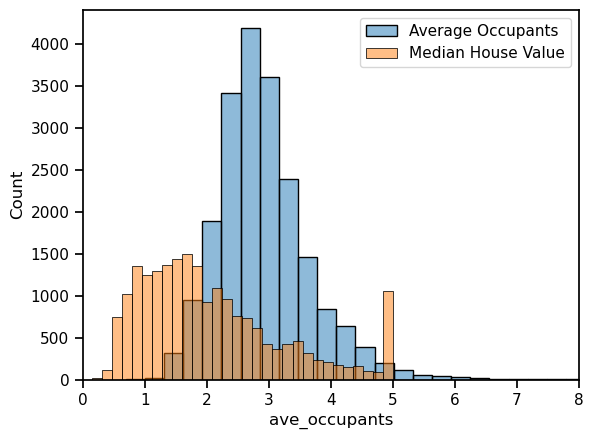

In [36]:
sns.set_context("notebook", font_scale = 1)

sns.histplot(x=df_clean['ave_occupants'], label='Average Occupants', bins=30, alpha=0.5)
sns.histplot(x=df_hv['med_house_val'], label='Median House Value', bins=30, alpha=0.5)
plt.legend()
plt.xlim(0, 8)

(-1.0, 3.0)

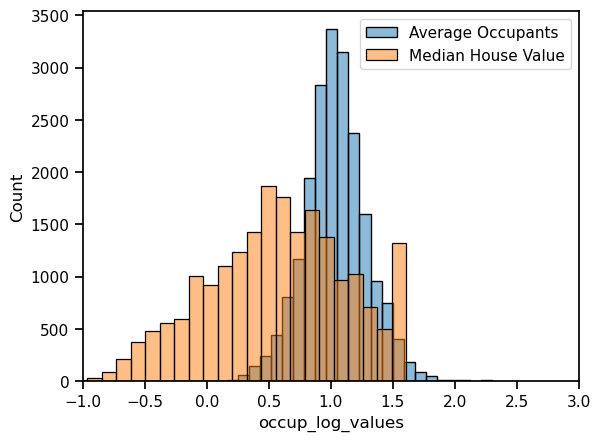

In [37]:
sns.set_context("notebook", font_scale = 1)

sns.histplot(x=df_clean['occup_log_values'], label='Average Occupants', bins=30, alpha=0.5)
sns.histplot(x=df_hv['hv_log_values'], label='Median House Value', bins=30, alpha=0.5)
plt.legend()
plt.xlim(-1, 3)

AI helped me figure out how to make a correlation table 

In [38]:
corr = merged_df[["ave_occupants", "med_house_val"]].corr()
print(corr)

               ave_occupants  med_house_val
ave_occupants       1.000000      -0.265409
med_house_val      -0.265409       1.000000


In [41]:
observations = pd.crosstab(index=df_clean["occup_categories"], columns=df_hv["hv_categories"],margins=True)
observations

hv_categories,low,moderate,high,very_high,All
occup_categories,,,,,
small,1795,2466,1177,150,5588
medium,3888,5121,1282,133,10424
large,1887,1545,113,9,3554
very_large,24,32,5,0,61
All,7594,9164,2577,292,19627


In [40]:
from scipy.stats import chi2_contingency

chi2, p, dof, ex = chi2_contingency(observations)

print("chi2 = ", chi2)
print("p = ", p)
print("degrees of freedom = ", dof)
print("expected = ", ex)

chi2 =  924.2392424009934
p =  3.7007461261533317e-193
degrees of freedom =  9
expected =  [[2.16208651e+03 2.60908096e+03 7.33697254e+02 8.31352728e+01]
 [4.03321221e+03 4.86704723e+03 1.36865787e+03 1.55082692e+02]
 [1.37509940e+03 1.65939043e+03 4.66635655e+02 5.28745096e+01]
 [2.36018750e+01 2.84813777e+01 8.00922199e+00 9.07525348e-01]]


I wanted to see what see what percentages would look like instead of frequencies (I figured out the code via stack overflow) 

In [43]:
pd.crosstab(df_clean["occup_categories"], df_hv["hv_categories"], normalize="index")

hv_categories,low,moderate,high,very_high
occup_categories,,,,
small,0.321224,0.441303,0.210630,0.026843
medium,0.372985,0.491270,0.122985,0.012759
large,0.530951,0.434721,0.031795,0.002532
very_large,0.393443,0.524590,0.081967,0.000000


Question 11

From my investigation, I found a few things. When I initially looked at the AveOccup data, I noticed there was an extreme outlier of 1,243.33 occupants, which I removed because it was far outside the normal range and distorted the results. After removing it, I saw that most of the data came from medium-sized households, while very large households made up the smallest portion of the data.

Comparing AveOccup data to MedHouseVal, I found that smaller households tend to have moderately valued homes and are also the group most likely to have very highly valued homes. Then I found that medium-sized households are more likely to live in moderately valued homes. At first, when I looked at the cross-tabulation, it seemed like medium-sized households were the most likely to live in low-value homes. However, because the number of observations in each occupancy category is not uniform, I looked at percentages instead of raw counts. After doing that, I found that large households were actually the most likely to live in low-value homes. Finally, I found that very large households were more likely to live in moderately valued homes, and none were in the very highly valued home category.

From the correlation test I ran, I got -0.27, indicating a weak relationship between median house values and average occupancy. 